## Reference

https://github.com/MorvanZhou/Tensorflow-Tutorial/tree/master/tutorial-contents

[Large Scale Machine Learning with Python](https://www.amazon.com/Large-Scale-Machine-Learning-Python-ebook/dp/B01CGKAINK)

https://www.tensorflow.org/get_started/get_started

## What is a Tensor

1d values (rank = 1) can be called **Vector** [1, 2, 3]

2d values (rank = 2) can be called **matrix** [[1, 2, 3],
                                               [4, 5, 6]]
                             
Higher dimensions are generally called rank k **Tensor**

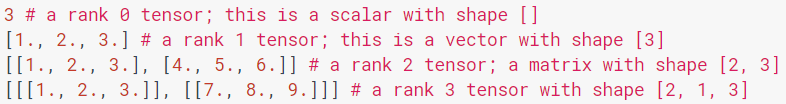

In [1]:
import tensorflow as tf
import numpy as np

In [13]:
arr = np.arange(12).reshape(3, 4)
print(arr)

t = tf.constant(arr)

print("shape = {}".format(t.shape))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
shape = (3, 4)


In [14]:
t = tf.random_normal([5, 5, 1, 32])
print('shape = {}'.format(t.shape))

print(t[0, 0, 0, 0])

shape = (5, 5, 1, 32)
Tensor("strided_slice_2:0", shape=(), dtype=float32)


In [12]:
t = tf.random_normal([3, 3, 1, 2])
print(t.shape)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(t))



(3, 3, 1, 2)
[[[[  5.33225238e-01  -1.05526555e+00]]

  [[ -7.98409045e-01  -4.57829833e-01]]

  [[  2.71632761e-01  -5.00106893e-04]]]


 [[[ -6.28229499e-01   2.65927345e-01]]

  [[  4.72325593e-01  -4.15780783e-01]]

  [[  1.21743572e+00  -2.38848731e-01]]]


 [[[ -5.45463145e-01   1.75184107e+00]]

  [[ -6.90213144e-01   1.42865467e+00]]

  [[ -2.52297342e-01   6.55086040e-01]]]]


## The Architecture

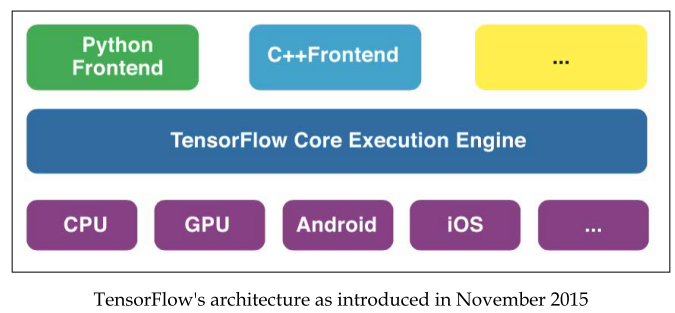

## Parallel Computation

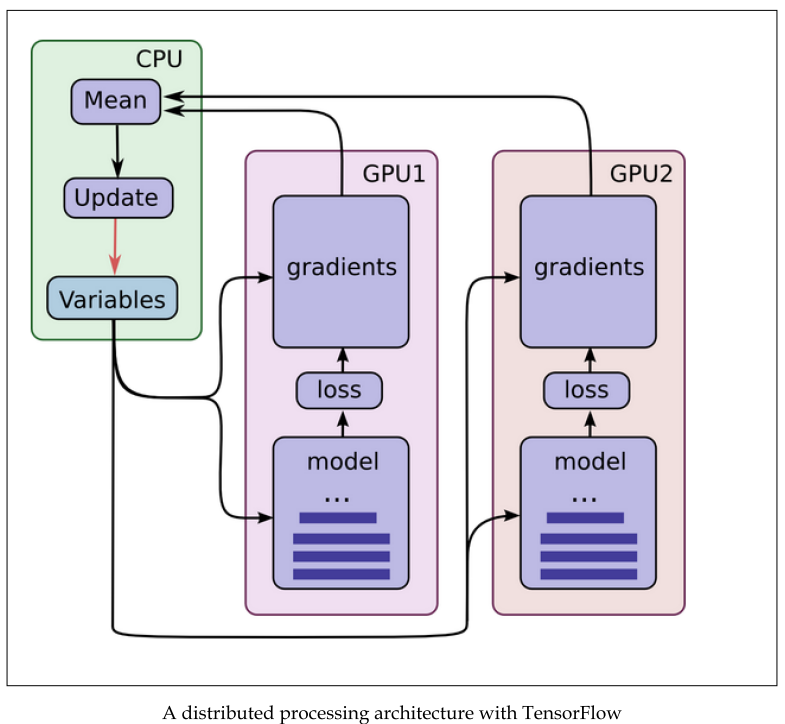

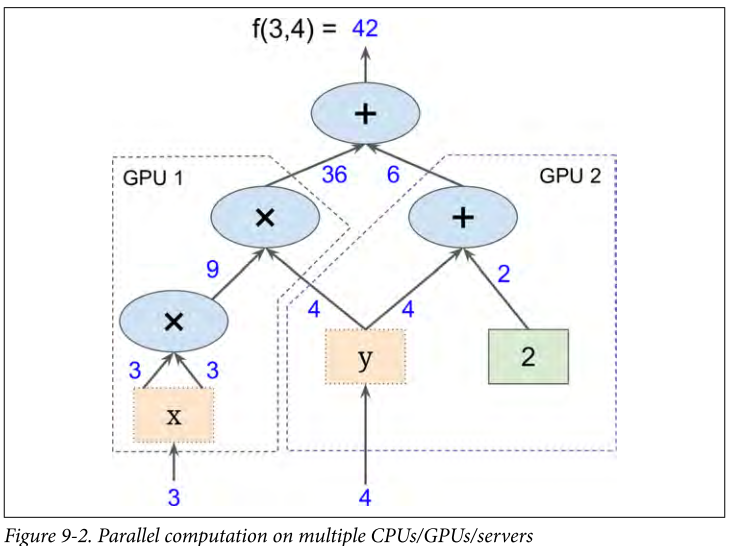

## Tensorflow Basics

1. build a computation graph (**construction phash**)
2. run it (**execution phash**)

### Create Tensors

In [15]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const_2:0", shape=(), dtype=float32) Tensor("Const_3:0", shape=(), dtype=float32)


Notice that printing the nodes does not output the values 3.0 and 4.0 as you might expect. Instead, **they are nodes that, when evaluated, would produce 3.0 and 4.0**, respectively. To actually evaluate the nodes, we must run the computational graph within a **session**. A session encapsulates the control and state of the TensorFlow runtime.

In [16]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


### Default Graph

Any node you create is automatically added to the default graph

In [7]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

### Manage Graph

> Sometimes you want to manage multiple independent graphs. You can do this by creating a new  Graph  and temporarily making it the default graph inside a with block.

> In **Jupyter** (or in a Python shell), it is common to run the same commands more than once while you are experimenting. As a result, you may end up with a default graph containing many duplicate nodes. One solution is to restart the Jupyter kernel (or
the Python shell), but a more convenient solution is to just reset the default graph by running **tf.reset_default_graph()**.

In [9]:
graph = tf.Graph()
with graph.as_default():
     x2 = tf.Variable(2)   

print(x2.graph is graph)
print(x2.graph is tf.get_default_graph())

True
False


## Lifecycle of a Node Value

The following codes start a session eval y, tensorflow automatically detects that it depends on x, which depends on w. So it evaluates w, x and then y. Once again, when it evaluates z.eval the sequence is w, x, z. 

**Tensorflow doesn't reuse previous results** so w and x are evaluated twice.

A variable starts its life when its initializer is run, and it ends when the session is closed.

In [12]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

# w and x are evaluated twice
with tf.Session() as sess:
    print(y.eval())  # 10
    print(z.eval())  # 15
    
# If you want w and x to be evaulated not twice but more efficiently, do this:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)  # 10
    print(z_val)  # 15

10
15
10
15


## Session

In [10]:
import tensorflow as tf

m1 = tf.constant([[2, 2]])
m2 = tf.constant([[3],
                  [3]])

# 1x2 * 2x1 --> 1x1
dot_operation = tf.matmul(m1, m2) # matrix multiply. just like np.dot

with tf.Session() as sess:
    # each time run is called, it triggers once
    result = sess.run(dot_operation)
    print(result)

[[12]]


## placeholder

Use placeholder to dynamically feed data at runtime. A placeholder is a promise to provide a value later.

In [4]:
import tensorflow as tf

a = tf.placeholder(tf.int8)
b = tf.placeholder(tf.int8)

sess = tf.Session()
result = sess.run(a + b, feed_dict={a: 10, b: 20})
sess.close()

print(result)

30


## Variable

Variables allow us to add **trainable parameters** to a graph. They are constructed with a **type** and **initial value**.

Constants are initialized when you call tf.constant, and their value can never change. By contrast, **variables are not initialized when you call tf.Variable**. To initialize all the variables in a TensorFlow program, you must explicitly call a special operation as follows:

In [18]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

It is important to realize init is a handle to the TensorFlow sub-graph that initializes all the global variables. Until we call sess.run, the variables are uninitialized.

In [23]:
import tensorflow as tf

var = tf.Variable(0)    # will be in the "global_variable" set

add_operation = tf.add(var, 1)
update_operation = tf.assign(var, add_operation)

sess = tf.Session()

# once define variables, you have to initialize them by doing this
sess.run(tf.global_variables_initializer())
for _ in range(3):
    sess.run(update_operation)
    print(sess.run(var))

##  variable assignment
print('before assign: {}'.format(sess.run(var)))
assign = tf.assign(var, 99)
sess.run(assign)
print('after assign: {}'.format(sess.run(var)))


sess.close()

1
2
3
before assign: 3
after assign: 99


## Activation

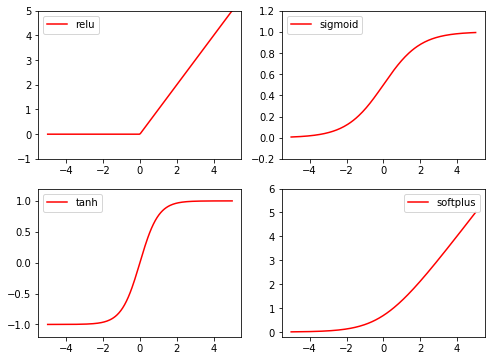

In [7]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# fake data
x = np.linspace(-5, 5, 200)     # x data, shape=(200, 1)

y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

with tf.Session() as sess:
    y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show() 

## Transpose

In [13]:
import tensorflow as tf
import numpy as np

arr = np.arange(24).reshape(2, 3, 4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tarr = tf.transpose(arr).eval()

tarr # equal to perm=[2, 1, 0] => shape from (2,3,4) to (4,3,2)

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tarr = tf.transpose(arr, perm=[1, 2, 0]).eval()
# shape (2,3,4) 
# idx    0,1,2
# perm = [1,2,0] => shape becomes (3, 4, 2)
tarr

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## Reshape

In [17]:
import numpy as np

arr = np.arange(45).reshape(3, 3, 5, 1)
arr

array([[[[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4]],

        [[ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9]],

        [[10],
         [11],
         [12],
         [13],
         [14]]],


       [[[15],
         [16],
         [17],
         [18],
         [19]],

        [[20],
         [21],
         [22],
         [23],
         [24]],

        [[25],
         [26],
         [27],
         [28],
         [29]]],


       [[[30],
         [31],
         [32],
         [33],
         [34]],

        [[35],
         [36],
         [37],
         [38],
         [39]],

        [[40],
         [41],
         [42],
         [43],
         [44]]]])

In [24]:
rearr = arr.reshape(1, 3, 3, -1)

print(rearr.shape)
rearr

(1, 3, 3, 5)


array([[[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],

        [[15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]],

        [[30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44]]]])

In [23]:
tarr = np.transpose(arr, (3, 0, 1, 2))

print(tarr.shape)
tarr

(1, 3, 3, 5)


array([[[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],

        [[15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]],

        [[30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44]]]])